<a href="https://colab.research.google.com/github/Ghisbe/Desafio_alura_store/blob/main/AluraStoreLatam_Desafio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Challenge Alura_Store**



#**Análisis de datos**

# Importación de datos



In [33]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)


In [34]:
#crear lista y diccionario de tiendas
tiendas = [tienda, tienda2, tienda3, tienda4]
nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
tiendas_dict = dict(zip(nombres_tiendas, tiendas))

In [35]:
tienda.head(2)

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359


In [36]:
tienda2.head(2)

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Silla de oficina,Muebles,283600.0,15300.0,04/08/2021,Izabela de León,Medellín,1,Nequi,1,6.25184,-75.56359
1,Pandereta,Instrumentos musicales,76800.0,2300.0,26/11/2020,Blanca Ramirez,Medellín,3,Tarjeta de crédito,4,6.25184,-75.56359


In [37]:
tienda3.head(2)

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Secadora de ropa,Electrodomésticos,1285100.0,66600.0,17/12/2021,Camila Rivera,Santa Marta,4,Tarjeta de crédito,4,11.24079,-74.19904
1,Mesa de noche,Muebles,290100.0,13600.0,10/02/2021,Maria Alfonso,Cali,3,Tarjeta de crédito,1,3.43722,-76.52250


In [38]:
tienda4.head(2)

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Lavavajillas,Electrodomésticos,1084800.0,56000.0,11/11/2022,Rafael Acosta,Bogotá,4,Tarjeta de crédito,3,4.60971,-74.08175
1,Cama box,Muebles,473800.0,25400.0,03/01/2020,Izabela de León,Cúcuta,5,Tarjeta de crédito,2,7.89391,-72.50782


##Averiguar el tipo de datos

In [39]:
tienda.dtypes

,0
Producto,object
Categoría del Producto,object
Precio,float64
Costo de envío,float64
Fecha de Compra,object
Vendedor,object
Lugar de Compra,object
Calificación,int64
Método de pago,object
Cantidad de cuotas,int64


#1. Análisis de facturación





In [40]:
#convertir columnas numéricas
for df in tiendas:
    df['Precio'] = pd.to_numeric(df['Precio'], errors='coerce')
    df['Costo de envío'] = pd.to_numeric(df['Costo de envío'], errors='coerce')

#facturación total por tienda
facturacion = {}
for nombre, df in zip(nombres_tiendas, tiendas):
    facturacion[nombre] = (df['Precio'] + df['Costo de envío']).sum()

total_general = sum(facturacion.values())

print("Facturación total por tienda")
for tienda, monto in facturacion.items():
    print(f"{tienda}: ${monto:,.2f}")
print(f"\nTotal de facturación: ${total_general:,.2f}")


Facturación total por tienda
Tienda 1: $1,212,258,300.00
Tienda 2: $1,175,828,600.00
Tienda 3: $1,156,536,200.00
Tienda 4: $1,093,693,100.00

Total de facturación: $4,638,316,200.00


# 2. Ventas por categoría

## Ventas por categoría, por tienda

In [41]:
#facturación por categoría
def calcular_ventas_categoria(df):
    ventas = df.groupby('Categoría del Producto')[['Precio', 'Costo de envío']].sum()
    ventas['Facturación Total'] = ventas.sum(axis=1)
    return ventas['Facturación Total']

#resultados por tienda
resultados_individuales = {}
for nombre, df in tiendas_dict.items():
    resultados_individuales[nombre] = calcular_ventas_categoria(df)

print("Ventas por Categoría - Detalle por Tienda")
for nombre, ventas in resultados_individuales.items():
    print(f"\n>> {nombre}:")
    print(ventas.sort_values(ascending=False).map('${:,.2f}'.format))

Ventas por Categoría - Detalle por Tienda

>> Tienda 1:
Categoría del Producto
Electrónicos               $452,457,200.00
Electrodomésticos          $383,009,200.00
Muebles                    $197,628,600.00
Instrumentos musicales      $96,182,900.00
Deportes y diversión        $41,411,100.00
Juguetes                    $18,975,200.00
Artículos para el hogar     $13,342,200.00
Libros                       $9,251,900.00
Name: Facturación Total, dtype: object

>> Tienda 2:
Categoría del Producto
Electrónicos               $432,645,300.00
Electrodomésticos          $367,123,400.00
Muebles                    $185,862,400.00
Instrumentos musicales     $110,548,000.00
Deportes y diversión        $36,621,800.00
Juguetes                    $16,833,000.00
Artículos para el hogar     $15,547,700.00
Libros                      $10,647,000.00
Name: Facturación Total, dtype: object

>> Tienda 3:
Categoría del Producto
Electrónicos               $432,631,700.00
Electrodomésticos          $346,732,10

## Ventas por categorías totales (uniendo las cuatro tiendas)

In [42]:
#concatenar todos los DataFrames de tiendas
df_global = pd.concat(tiendas_dict.values(), ignore_index=True)

#calcular facturación total global
ventas_global = calcular_ventas_categoria(df_global)

print("Facturación total por categoría:")
print("\n")
print(ventas_global.sort_values(ascending=False).map('${:,.2f}'.format))

Facturación total por categoría:


Categoría del Producto
Electrónicos               $1,749,038,600.00
Electrodomésticos          $1,395,147,400.00
Muebles                      $798,111,400.00
Instrumentos musicales       $367,276,900.00
Deportes y diversión         $150,669,300.00
Juguetes                      $77,625,700.00
Artículos para el hogar       $60,690,900.00
Libros                        $39,756,000.00
Name: Facturación Total, dtype: object


# 3. Calificación promedio de la tienda


In [43]:
#se convierte la calificación a numérico
for df in tiendas:
    df['Calificación'] = pd.to_numeric(df['Calificación'], errors='coerce')

calificacion_promedio = {}
for nombre, df in zip(nombres_tiendas, tiendas):
    calificacion_promedio[nombre] = df['Calificación'].mean()

print("\nCalificación Promedio por Tienda")
print("\n")
for nombre, promedio in calificacion_promedio.items():
    print(f"{nombre}: {promedio:.2f}")
print("\n")
print(f"Promedio total: {sum(calificacion_promedio.values())/len(calificacion_promedio):.2f}")


Calificación Promedio por Tienda


Tienda 1: 3.98
Tienda 2: 4.04
Tienda 3: 4.05
Tienda 4: 4.00


Promedio total: 4.01


# 4. Productos más y menos vendidos

##Productos más y menos vendidos por tienda

In [44]:
productos_mas_vendidos = {}
productos_menos_vendidos = {}

for i, df in enumerate(tiendas, start=1):
    nombre = f'Tienda {i}'

    if df.empty or 'Producto' not in df.columns:
        continue

    conteo = df['Producto'].value_counts()
    if conteo.empty:
        continue

    #productos más y menos vendidos
    productos_mas_vendidos[nombre] = (conteo.idxmax(), conteo.max())
    productos_menos_vendidos[nombre] = (conteo.idxmin(), conteo.min())

print("Productos más y menos vendidos por tienda")
print("-" * 60)

print("\nProductos más vendidos (por tienda):")
for tienda, (producto, cantidad) in productos_mas_vendidos.items():
    print(f"- {tienda}: {producto} ({cantidad} unidades)")

print("\nProductos menos vendidos (por tienda):")
for tienda, (producto, cantidad) in productos_menos_vendidos.items():
    print(f"- {tienda}: {producto} ({cantidad} unidades)")

Productos más y menos vendidos por tienda
------------------------------------------------------------

Productos más vendidos (por tienda):
- Tienda 1: Microondas (60 unidades)
- Tienda 2: Iniciando en programación (65 unidades)
- Tienda 3: Kit de bancas (57 unidades)
- Tienda 4: Cama box (62 unidades)

Productos menos vendidos (por tienda):
- Tienda 1: Auriculares con micrófono (33 unidades)
- Tienda 2: Juego de mesa (32 unidades)
- Tienda 3: Bloques de construcción (35 unidades)
- Tienda 4: Guitarra eléctrica (33 unidades)


##Productos más y menos vendidos por tienda con su facturación

In [45]:
productos_mas_facturados = {}
productos_menos_facturados = {}

#facturación total por producto en cada tienda
for i, df in enumerate(tiendas, start=1):
    nombre = f'Tienda {i}'

    if df.empty or not {'Producto', 'Precio', 'Costo de envío'}.issubset(df.columns):
        continue

    #se aseguran que los valores sean numéricos
    df[['Precio', 'Costo de envío']] = df[['Precio', 'Costo de envío']].apply(pd.to_numeric, errors='coerce')

    #se calculan la facturación total de cada producto
    df['Facturación'] = df['Precio'] + df['Costo de envío']
    facturacion_por_producto = df.groupby('Producto')['Facturación'].sum()

    if facturacion_por_producto.empty:
        continue

    #se colocan los producto más y menos facturados
    productos_mas_facturados[nombre] = (facturacion_por_producto.idxmax(), facturacion_por_producto.max())
    productos_menos_facturados[nombre] = (facturacion_por_producto.idxmin(), facturacion_por_producto.min())

print("Productos con mayor y menor facturación por tienda")
print("-" * 65)

print("\nProductos más facturados (por tienda):")
for tienda, (producto, total) in productos_mas_facturados.items():
    print(f"- {tienda}: {producto} (${total:,.2f})")

print("\nProductos menos facturados (por tienda):")
for tienda, (producto, total) in productos_menos_facturados.items():
    print(f"- {tienda}: {producto} (${total:,.2f})")

Productos con mayor y menor facturación por tienda
-----------------------------------------------------------------

Productos más facturados (por tienda):
- Tienda 1: TV LED UHD 4K ($149,741,100.00)
- Tienda 2: Iphone 15 ($119,255,900.00)
- Tienda 3: Refrigerador ($105,183,200.00)
- Tienda 4: Iphone 15 ($101,839,500.00)

Productos menos facturados (por tienda):
- Tienda 1: Cuerda para saltar ($735,400.00)
- Tienda 2: Cubo mágico 8x8 ($714,800.00)
- Tienda 3: Cubo mágico 8x8 ($686,000.00)
- Tienda 4: Cuerda para saltar ($758,700.00)


# 5. Envío promedio por tienda

In [46]:
costo_envio_promedio = {}
for nombre, df in tiendas_dict.items():
    costo_envio_promedio[nombre] = df['Costo de envío'].mean()

print("Costo de Envío Promedio por Tienda")
print("-" * 35)
for nombre, promedio in costo_envio_promedio.items():
    print(f"{nombre}: ${promedio:,.2f}")
print("\n")
print(f"Promedio total: ${sum(costo_envio_promedio.values())/len(costo_envio_promedio):,.2f}")

Costo de Envío Promedio por Tienda
-----------------------------------
Tienda 1: $26,018.61
Tienda 2: $25,216.24
Tienda 3: $24,805.68
Tienda 4: $23,459.46


Promedio total: $24,875.00


#**Informe_final**

##Introducción

El objetivo de este análisis es evaluar la performance comercial de las cuatro tiendas del Sr. Juan a partir de cuatro datasets, y entregar observaciones, insights y recomendaciones accionables para la toma de decisiones en cuanto a la venta de una de ellas.

Se adjuntan visualizaciones como soporte del análisis.

### Análisis de Facturación
Esta sección evalúa el rendimiento financiero general midiendo la facturación total generada por cada tienda. Se genera un gráfico de circular para visualizar las diferencias.

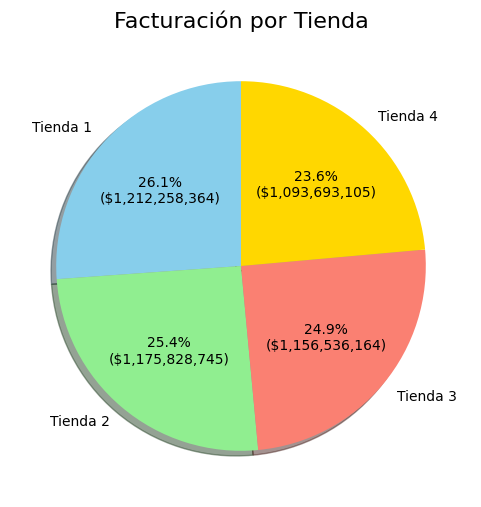

In [47]:
tiendas_nombres = list(facturacion.keys())
montos = list(facturacion.values())
colores = ['skyblue', 'lightgreen', 'salmon', 'gold']

plt.figure(figsize=(6, 6))
plt.pie(
    montos,
    labels=tiendas_nombres,
    autopct=lambda p: f'{p:.1f}%\n(${p*total_general/100:,.0f})',
    colors=colores,
    startangle=90,
    shadow=True
)
plt.title('Facturación por Tienda', fontsize=16)
plt.show()

**Resultado:**

* Tienda 1: $1.212.258.300

* Tienda 2: $1.175.828.600

* Tienda 3: $1.156.536.200

* Tienda 4: $1.093.693.100

Total: $4.638.316.200.

**Observación:** la diferencia entre la tienda con mayor facturación (Tienda 1) y la menor (Tienda 4) muestra que no hay una brecha gigante, lo que sugiere que la operación está relativamente equilibrada entre las tiendas.

### Ventas por categoría

Se analizan las categorías de productos más populares por cantidad de unidades vendidas y por facturación tanto tienda por tienda y a nivel global.
Se crea un gráfico de área se para mostrar la "Facturación Total" por categoría porque permite visualizar de forma inmediata tanto la magnitud absoluta de cada categoría como su aporte relativo al total del negocio. Al rellenar el área bajo la curva, el ojo percibe al instante que electrónicos y electrodomésticos representan más del 67 % del ingreso total de Alura Store, mientras que las seis categorías restantes apenas suman el 33 % restante.


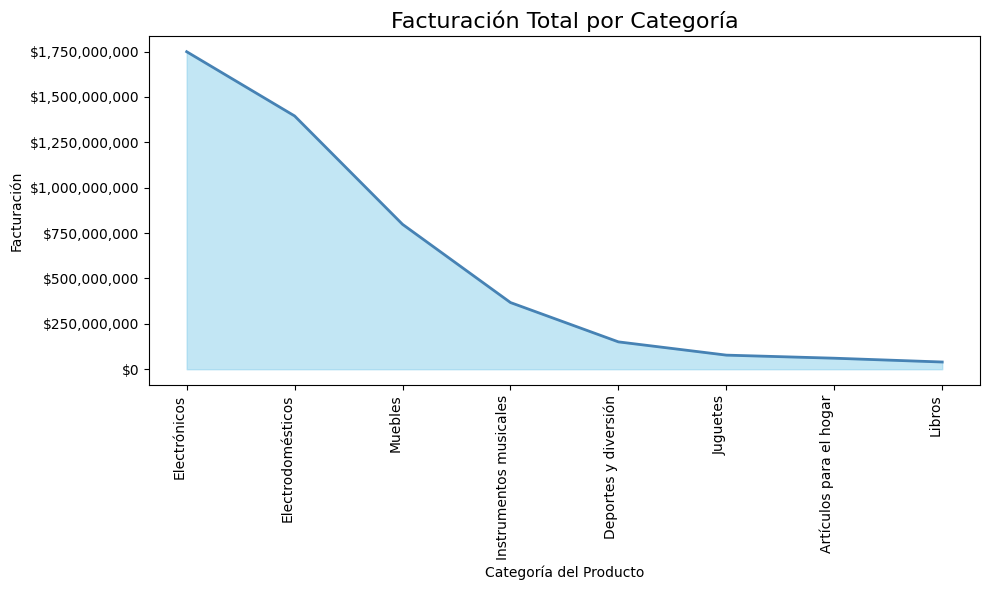

In [48]:
ventas_global_sorted = ventas_global.sort_values(ascending=False)

plt.figure(figsize=(10,6))
plt.fill_between(ventas_global_sorted.index, ventas_global_sorted.values, color='skyblue', alpha=0.5)
plt.plot(ventas_global_sorted.index, ventas_global_sorted.values, color='steelblue', linewidth=2)

plt.title('Facturación Total por Categoría', fontsize=16)
plt.ylabel('Facturación')
plt.xlabel('Categoría del Producto')
plt.xticks(rotation=90, ha='right')
plt.gca().yaxis.set_major_formatter('${:,.0f}'.format)

plt.tight_layout()
plt.show()

**Resultado:**
</br>
<table>
  <thead>
    <tr><th>Categoría</th><th>Facturación</th></tr>
  </thead>
  <tbody>
    <tr><td>Electrónicos</td><td>$1.749M</td></tr>
    <tr><td>Electrodomésticos</td><td>$1.395M</td></tr>
    <tr><td>Muebles</td><td>$798M</td></tr>
    <tr><td>Instrumentos musicales</td><td>$367M</td></tr>
    <tr><td>Deportes y diversión</td><td>$151M</td></tr>
    <tr><td>Juguetes</td><td>$78M</td></tr>
    <tr><td>Artículos hogar</td><td>$61M</td></tr>
    <tr><td>Libros</td><td>$40M</td></tr>
  </tbody>
</table>


**Observación:** electrónicos y electrodomesticos representan una altísima concentración de ventas pero también muestra una fortaleza clara: sabemos exactamente qué vende.

### Calificación promedio

Aqui se analiza la calificación promedio por tienda pudiendo observar que la tienda 1 quien es la que mayor ingresos proporciona, es la "peor" calificada en comparación con las demás.
</br>
<table style="border-collapse: collapse; width: 40%; text-align: center;">
  <thead>
    <tr style="background-color: #f2f2f2;">
      <th style="border: 1px solid #999; padding: 8px;">Tienda</th>
      <th style="border: 1px solid #999; padding: 8px;">Calificación Promedio</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="border: 1px solid #999; padding: 8px;">Tienda 3</td>
      <td style="border: 1px solid #999; padding: 8px;">4.05</td>
    </tr>
    <tr>
      <td style="border: 1px solid #999; padding: 8px;">Tienda 2</td>
      <td style="border: 1px solid #999; padding: 8px;">4.04</td>
    </tr>
    <tr>
      <td style="border: 1px solid #999; padding: 8px;">Tienda 4</td>
      <td style="border: 1px solid #999; padding: 8px;">4.00</td>
    </tr>
    <tr>
      <td style="border: 1px solid #999; padding: 8px;">Tienda 1</td>
      <td style="border: 1px solid #999; padding: 8px;">3.98</td>
    </tr>
  </tbody>
</table>


### Productos que más y menos facturan

Se realizó un análisis teniendo en cuenta aquellos productos que más y menos facturan por tienda.

En la primer tabla pueden observar aquellos productos que más y menos se vendieron teniendo en cuenta la cantidad de ventas que lograron.
</br>
<table style="border-collapse: collapse; width: 70%; text-align: center;">
  <thead>
    <tr style="background-color: #f2f2f2;">
      <th style="border: 1px solid #999; padding: 8px;">Tienda</th>
      <th style="border: 1px solid #999; padding: 8px;">Más vendido (unidades)</th>
      <th style="border: 1px solid #999; padding: 8px;">Menos vendido (unidades)</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="border: 1px solid #999; padding: 8px;">Tienda 1</td>
      <td style="border: 1px solid #999; padding: 8px;">Microondas (60)</td>
      <td style="border: 1px solid #999; padding: 8px;">Auriculares con micrófono (33)</td>
    </tr>
    <tr>
      <td style="border: 1px solid #999; padding: 8px;">Tienda 2</td>
      <td style="border: 1px solid #999; padding: 8px;">Iniciando en programación (65)</td>
      <td style="border: 1px solid #999; padding: 8px;">Juego de mesa (32)</td>
    </tr>
    <tr>
      <td style="border: 1px solid #999; padding: 8px;">Tienda 3</td>
      <td style="border: 1px solid #999; padding: 8px;">Kit de bancas (57)</td>
      <td style="border: 1px solid #999; padding: 8px;">Bloques de construcción (35)</td>
    </tr>
    <tr>
      <td style="border: 1px solid #999; padding: 8px;">Tienda 4</td>
      <td style="border: 1px solid #999; padding: 8px;">Cama box (62)</td>
      <td style="border: 1px solid #999; padding: 8px;">Guitarra eléctrica (33)</td>
    </tr>
  </tbody>
</table>
</br>

En esta segunda tabla, se tiene en cuenta la facturación que lograron los productos, pudiendo ver de mejor manera la performance de estos y el comportamiento del cliente en cuanto a la preferencia de productos.
</br>
<table style="border-collapse: collapse; width: 90%; text-align: center;">
  <thead>
    <tr style="background-color: #f2f2f2;">
      <th style="border: 1px solid #999; padding: 8px;">Tienda</th>
      <th style="border: 1px solid #999; padding: 8px;">Producto más facturado</th>
      <th style="border: 1px solid #999; padding: 8px;">Monto</th>
      <th style="border: 1px solid #999; padding: 8px;">Producto menos facturado</th>
      <th style="border: 1px solid #999; padding: 8px;">Monto</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="border: 1px solid #999; padding: 8px;">T1</td>
      <td style="border: 1px solid #999; padding: 8px;">TV LED UHD 4K</td>
      <td style="border: 1px solid #999; padding: 8px;">$149.7M</td>
      <td style="border: 1px solid #999; padding: 8px;">Cuerda para saltar</td>
      <td style="border: 1px solid #999; padding: 8px;">$735k</td>
    </tr>
    <tr>
      <td style="border: 1px solid #999; padding: 8px;">T2</td>
      <td style="border: 1px solid #999; padding: 8px;">iPhone 15</td>
      <td style="border: 1px solid #999; padding: 8px;">$119.3M</td>
      <td style="border: 1px solid #999; padding: 8px;">Cubo mágico 8x8</td>
      <td style="border: 1px solid #999; padding: 8px;">$715k</td>
    </tr>
    <tr>
      <td style="border: 1px solid #999; padding: 8px;">T3</td>
      <td style="border: 1px solid #999; padding: 8px;">Refrigerador</td>
      <td style="border: 1px solid #999; padding: 8px;">$105.2M</td>
      <td style="border: 1px solid #999; padding: 8px;">Cubo mágico 8x8</td>
      <td style="border: 1px solid #999; padding: 8px;">$686k</td>
    </tr>
    <tr>
      <td style="border: 1px solid #999; padding: 8px;">T4</td>
      <td style="border: 1px solid #999; padding: 8px;">iPhone 15</td>
      <td style="border: 1px solid #999; padding: 8px;">$101.8M</td>
      <td style="border: 1px solid #999; padding: 8px;">Cuerda para saltar</td>
      <td style="border: 1px solid #999; padding: 8px;">$759k</td>
    </tr>
  </tbody>
</table>
</br>

En el siguiente gráfico se puede apreciar mejor esta performance, pudiendo observar de manera comparativa.


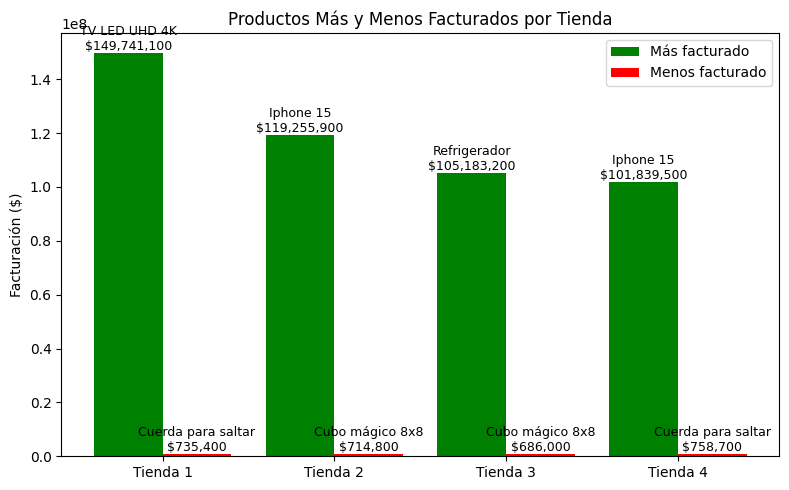

In [49]:
tiendas = list(productos_mas_facturados.keys())

#facturación y productos
facturacion_max = [v[1] for v in productos_mas_facturados.values()]
productos_max = [v[0] for v in productos_mas_facturados.values()]

facturacion_min = [v[1] for v in productos_menos_facturados.values()]
productos_min = [v[0] for v in productos_menos_facturados.values()]

#posición de las barras
posiciones = range(len(tiendas))
ancho = 0.4

fig, ax = plt.subplots(figsize=(8,5))

#barras
barras_max = ax.bar([p - ancho/2 for p in posiciones], facturacion_max, width=ancho, color='green', label='Más facturado')
barras_min = ax.bar([p + ancho/2 for p in posiciones], facturacion_min, width=ancho, color='red', label='Menos facturado')
ax.set_xticks(posiciones)
ax.set_xticklabels(tiendas)
ax.set_ylabel('Facturación ($)')
ax.set_title('Productos Más y Menos Facturados por Tienda')
ax.legend()

#etiquetas sobre las barras
for barra, nombre in zip(barras_max, productos_max):
    altura = barra.get_height()
    ax.text(barra.get_x() + barra.get_width()/2, altura + 1, f'{nombre}\n${altura:,.0f}', ha='center', va='bottom', fontsize=9)

for barra, nombre in zip(barras_min, productos_min):
    altura = barra.get_height()
    ax.text(barra.get_x() + barra.get_width()/2, altura + 1, f'{nombre}\n${altura:,.0f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

**Observación:** tomamos como referencia para el análisis de este apartado la facturación ya que la cantidad de ventas en número no refleja el real ingreso ya que se puede vender más un producto que otro pero al final lo que interesa es cuanto me da de retorno en dinero. Por lo que teniendo en cuenta esto último, los electrodomesticos sobre todos aquellos referidos al entretenimiento y la comunicación son los más vendidos.
Y como observación final, aquellos de la rama de los juguetes son los que menos se vendieron.

### Costo de envío promedio
Se analiza en este apartado el costo de los envíos de diferentes produtos, siendo este monto el que se refleja en el precio final al cliente.

</br>
<table style="border-collapse: collapse; width: 90%; text-align: center;">
  <thead>
    <tr style="background-color: #f2f2f2;">
      <th style="border: 1px solid #999; padding: 8px;">Tienda</th>
      <th style="border: 1px solid #999; padding: 8px;">Costo Envío Promedio</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="border: 1px solid #999; padding: 8px;">T1</td>
      <td style="border: 1px solid #999; padding: 8px;">$26.018</td>
    </tr>
    <tr>
      <td style="border: 1px solid #999; padding: 8px;">T2</td>
      <td style="border: 1px solid #999; padding: 8px;">$25.216</td>
    </tr>
    <tr>
      <td style="border: 1px solid #999; padding: 8px;">T3</td>
      <td style="border: 1px solid #999; padding: 8px;">$24.806</td>
    </tr>
    <tr>
      <td style="border: 1px solid #999; padding: 8px;">T4</td>
      <td style="border: 1px solid #999; padding: 8px;">$23.459</td>
    </tr>
  </tbody>
</table>
</br>

**Observación:** Un costo de envío más alto significa un envío de productos más pesados o caros teniendo un mayor margen bruto.
La Tienda 4 tiene el menor costo de envío, lo que se traduce en menor valor por orden y por ende en menor rentabilidad por transacción.


### **Resumen del análisis**


La Tienda 1 lidera con \$1.212 M en facturación, superando por \$118 M a la Tienda 4, que es la más baja con \$1.094 M.

Las cuatro tiendas están muy parejas: la diferencia entre la mejor y la peor es mínima.

En calificación, la Tienda 3 gana con 4.05, mientras que la Tienda 1 queda última con 3.98.

El costo de envío promedio más alto lo tiene la Tienda 1 (\$26.018) y el más bajo la Tienda 4 (\$23.459), lo que indica que T4 maneja productos más livianos y de menor ticket, o vende menos, como sugiere su facturación.

La Tienda 1 genera más ingresos, pero a costa de una peor experiencia del cliente.

Por otro lado, la Tienda 4 no solo factura menos, sino que lo hace con órdenes de menor valor y menor margen por envío.

Aunque ninguna tienda tiene una mala performance, la Tienda 4 es claramente la de menor aporte y menor rentabilidad por transacción.




### **Recomendación**
Recomendación final: Vender la tienda 4.

Razones para venderla:

Es la que menos aporta y tiene el menor costo de envío promedio, menor valor por orden y por ende el menor margen bruto por venta.
Su facturación está $118M por debajo de la Tienda 1 que podemos reinvertir en hacer crecer las otras tres tiendas.
En cuanto a su calificación de 4,00 está en el medio en relación a las demás por lo que no estamos vendiendo a la que mejor experiencia al cliente tiene.
Al quedarnos con T1, T2 y T3 concentraremos el 76,4% del negocio en solo 3 locales que ya facturan más y tienen mejor índice de satisfacción.